In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\USER\Documents\Data_Cleaning\clean_data.csv")

# Data Exploration

In [3]:
df.head(2)

,Unnamed: 0,Title,Price_sold,Item_location,Link,Seller_name,Seller_feedback,Seller_Rating%,Shipping_price,Shipping_type
0,1,Intelligent Investor: The Definitive Book on V...,10.34,United Kingdom,https://www.ebay.com/itm/304442680952?epid=872...,worldofbooks08,9071377,99.1,9.13,Paid shipping
1,2,Power BI - Business Intelligence Clinic: Creat...,14.99,United States,https://www.ebay.com/itm/186043394348?epid=603...,chev1967_138,563,100.0,30.57,Paid shipping


In [4]:
# Remove the first column
df = df.iloc[:, 1:]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            300 non-null    object 
 1   Price_sold       300 non-null    float64
 2   Item_location    300 non-null    object 
 3   Link             300 non-null    object 
 4   Seller_name      300 non-null    object 
 5   Seller_feedback  300 non-null    int64  
 6   Seller_Rating%   300 non-null    float64
 7   Shipping_price   300 non-null    float64
 8   Shipping_type    300 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 21.2+ KB


**There are 9 columns and 300 rows.**

In [6]:
df.describe(include="all")

,Title,Price_sold,Item_location,Link,Seller_name,Seller_feedback,Seller_Rating%,Shipping_price,Shipping_type
count,300,300.000000,300,300,300,3.000000e+02,300.00000,300.000000,300
unique,70,NaN,5,75,38,NaN,NaN,NaN,2
top,Delivering Business Intelligence with Microsof...,NaN,United Kingdom,https://www.ebay.com/itm/304442680952?epid=872...,webuybooks,NaN,NaN,NaN,Paid shipping
freq,12,NaN,140,4,56,NaN,NaN,NaN,296
mean,NaN,26.833333,NaN,NaN,NaN,7.921529e+05,98.95600,25.572400,NaN
std,NaN,38.579373,NaN,NaN,NaN,1.272809e+06,1.17308,25.465406,NaN
min,NaN,2.000000,NaN,NaN,NaN,3.200000e+01,94.70000,0.000000,NaN
25%,NaN,7.870000,NaN,NaN,NaN,1.476000e+03,98.40000,6.000000,NaN
50%,NaN,14.080000,NaN,NaN,NaN,1.744260e+05,99.30000,14.610000,NaN
75%,NaN,31.730000,NaN,NaN,NaN,1.002348e+06,99.60000,31.790000,NaN


**There are 70 unique books, 5 locations, 38 sellers and two shipping type.**

**The minimum seller rating is 94.7%, the maximum is 100%, the average is 98.95% and the median is 99.3%**

In [7]:
df.isnull().sum()

Title              0
Price_sold         0
Item_location      0
Link               0
Seller_name        0
Seller_feedback    0
Seller_Rating%     0
Shipping_price     0
Shipping_type      0
dtype: int64

**There is no null value in the dataset**

# Analysis

* Who are the highest performing sellers?
* What are the top selling books?
* What is the average price of items sold?
* How many unique item locations are there?
* Distribution of Books by Location.
* How many books are the price above the average price.
* The shipping types by the sellers and their percentage.
* Distribution of seller ratings.
* How many sellers has a rating above average.
* What are the average price of items within each location?
* Is there a relationship between seller feedback and seller rating percentage?
* Is there correlations between "Price_sold" and "Seller_Rating%"?

#### Who are the highest performing sellers?
We'll group the data by "Seller_name" and calculate the average price and seller rating for each seller.
We'll calculate the total number of items sold by each seller then sort the sellers by their average price, seller rating and number of product sold

In [8]:
seller_performance = df.groupby('Seller_name').agg({'Price_sold': 'mean', 'Seller_Rating%': 'mean'})
seller_performance['Number_of_Items_Sold'] = df.groupby('Seller_name')['Price_sold'].count()

In [9]:
performance_by_price = seller_performance.sort_values(by=['Price_sold'], ascending=False)
performance_by_price.head(10)

,Price_sold,Seller_Rating%,Number_of_Items_Sold
Seller_name,,,
rarewaves-outlet,160.623333,98.8,12
awesomebooksusa,75.000000,98.0,4
grandeagleretail,70.120000,98.1,12
the_nile_uk_store,69.405000,98.3,8
1000thingsaus,49.720000,100.0,4
vbbc2015,49.490000,100.0,4
bmk12333,48.710000,100.0,4
rch-collection,42.990000,94.8,4
globalxo,36.000000,98.4,4


In [10]:
performance_by_rating = seller_performance.sort_values(by=['Seller_Rating%'], ascending=False)
performance_by_rating.head(10)

,Price_sold,Seller_Rating%,Number_of_Items_Sold
Seller_name,,,
1000thingsaus,49.72,100.0,4
georgeswave,6.99,100.0,4
vbbc2015,49.49,100.0,4
sch-8076,33.92,100.0,4
nlpr8577,9.99,100.0,4
njvswatches,6.00,100.0,4
mgc12121,21.99,100.0,4
kobr2615,7.95,100.0,4
jacksdaddy18,22.00,100.0,4


In [11]:
performance_by_Number_of_Items_Sold = seller_performance.sort_values(by=['Number_of_Items_Sold'], ascending=False)
performance_by_Number_of_Items_Sold.head(10)

,Price_sold,Seller_Rating%,Number_of_Items_Sold
Seller_name,,,
webuybooks,7.810714,99.3,56
book_fountain,14.474444,99.2,36
cmedia_group,8.086667,99.5,24
dunkin_bookstore,29.433333,99.3,12
rarewaves-outlet,160.623333,98.8,12
second.sale,12.616667,98.2,12
grandeagleretail,70.120000,98.1,12
the_nile_uk_store,69.405000,98.3,8
worldofbooksusa,26.985000,95.8,8


#### What are the top selling books?

In [12]:
pd.set_option('display.max_colwidth', None)
top_selling_books = df.sort_values(by='Price_sold', ascending=False).drop_duplicates(subset='Title')
top_selling_books[['Title', 'Price_sold']].head(10)

,Title,Price_sold
103,Isaack Onyango Business Intelligence (Hardback),236.92
24,Business Intelligence for Business Development by Wendy Witte (English) Hardcove,116.29
183,Operational Business Intelligence im Kontext der Analyse und Steuerung von Gesch,85.04
114,Microsoft Business Intelligence Tools for Excel Analysts By Mich,75.00
176,Enterprise Resource Planning and Business Intelligence Systems for Information Q,73.00
48,Perspectives on Business Intelligence by Raymond T. Ng (English) Paperback Book,52.32
224,"Adaptive Business Intelligence by Constantin Chiriac, Zbigniew Michalewicz Book",49.72
228,"Business Intelligence : Practices, Technologies, and Management by Irma...TPB",49.49
145,"Business Intelligence: A Managerial Approach, Global Edition by David King,...",48.71
278,"Business Intelligence: A Managerial Persp... by King, David Paperback / softback",45.74


In [13]:
pd.reset_option('display.max_colwidth')

#### What is the average price of items sold?

In [14]:
average_price = df['Price_sold'].mean()
print("The average price of items sold is:", average_price)

The average price of items sold is: 26.83333333333331


#### How many unique item locations are there?

In [15]:
unique_item_locations = df['Item_location'].unique()
number_of_unique_item_locations = df['Item_location'].nunique()
print("The number of unique item locations is:", number_of_unique_item_locations)
print("The item locations are:", unique_item_locations)

The number of unique item locations is: 5
The item locations are: ['United Kingdom' 'United States' 'Australia' 'Canada' 'India']


#### Distribution of Books by Location.

In [16]:
books_sold_by_location = df.groupby('Item_location')['Title'].count()
books_sold_by_location = books_sold_by_location.reset_index()
books_sold_by_location.columns = ['Item_location', 'Total_Items_Sold']
books_sold_by_location

,Item_location,Total_Items_Sold
0,Australia,20
1,Canada,4
2,India,4
3,United Kingdom,140
4,United States,132


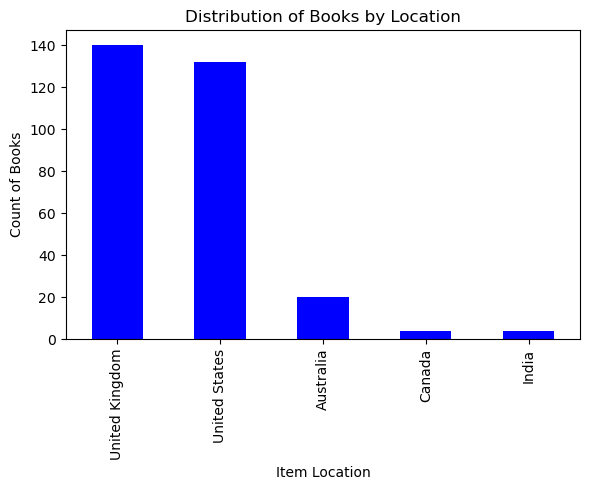

In [17]:
book_location_counts = df['Item_location'].value_counts()
plt.figure(figsize=(6, 5))
book_location_counts.plot(kind='bar', color='blue')
plt.title("Distribution of Books by Location")
plt.xlabel("Item Location")
plt.ylabel("Count of Books")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### How many books are the price above the average price?

In [18]:
average_price = df['Price_sold'].mean()
above_average_price = df['Price_sold'] > average_price
books_above_average_price = df[above_average_price]
books_above_average_price['Title'].count()

88

#### The shipping types and their percentage.

In [19]:
shipping_type_counts = df['Shipping_type'].value_counts()
shipping_type_percentages = (shipping_type_counts / shipping_type_counts.sum()) * 100
shipping_type_distribution = pd.DataFrame({
    'Shipping Type': shipping_type_counts.index,
    'Percentage': shipping_type_percentages
})

shipping_type_distribution

,Shipping Type,Percentage
Paid shipping,Paid shipping,98.666667
Free shipping,Free shipping,1.333333


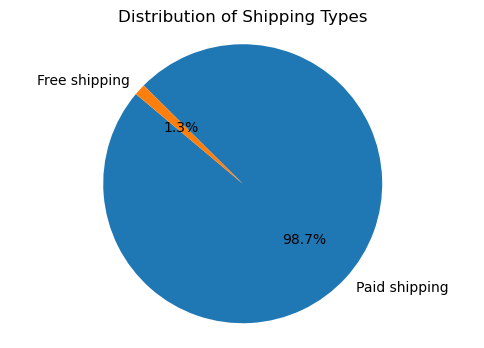

In [20]:
plt.figure(figsize=(6, 4))
plt.pie(shipping_type_percentages, labels=shipping_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Shipping Types")
plt.axis('equal')
plt.show()

#### Distribution of seller ratings.

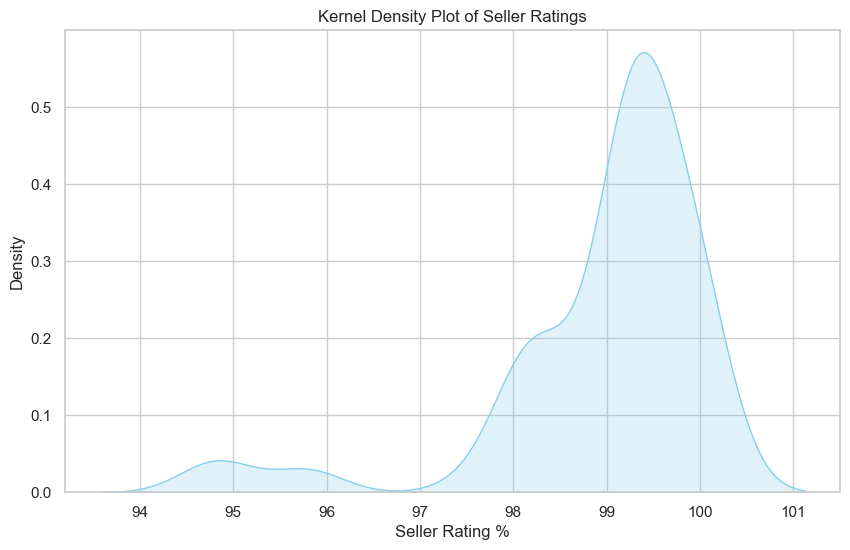

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Seller_Rating%'], shade=True, color='skyblue')
plt.title("Kernel Density Plot of Seller Ratings")
plt.xlabel("Seller Rating %")
plt.ylabel("Density")
plt.show()

#### How many sellers has a rating above average.

In [22]:
average_seller_rating = df['Seller_Rating%'].mean()
above_average_rating = df['Seller_Rating%'] > average_seller_rating
sellers_above_average_rating = df[above_average_rating]
print("The number of sellers with above average rating is:", sellers_above_average_rating['Seller_name'].count())

The number of sellers with above average rating is: 212


#### What are the average price of items within each location?

In [23]:
pd.set_option('display.max_rows', None)
average_price_by_title_location = df.groupby(['Title', 'Item_location'])['Price_sold'].mean().reset_index()
average_price_by_title_location.columns = ['Title', 'Item_location', 'Average_Price_Sold']
average_price_by_title_location

,Title,Item_location,Average_Price_Sold
0,Adaptive Business Intelligence by Constantin C...,Australia,49.720
1,Artificial Intelligence : The Insights You Nee...,United States,6.000
2,Better Business Intelligence By Robert Collins,United Kingdom,14.080
3,"Better Business Intelligence,Robert Collins",United Kingdom,5.640
4,Building Business Intelligence Using SAS: Cont...,United Kingdom,13.680
5,Business Analytics for Managers: Taking Busine...,United Kingdom,11.220
6,"Business Intelligence : Practices, Technologie...",United States,49.490
7,Business Intelligence A Managerial Approach 2n...,United States,21.990
8,Business Intelligence Competency Centers: A Te...,United Kingdom,11.320
9,Business Intelligence and Analytics 10th Edtn ...,United States,31.900


In [24]:
pd.reset_option('display.max_rows')

#### Is there a relationship between seller feedback and seller rating percentage.

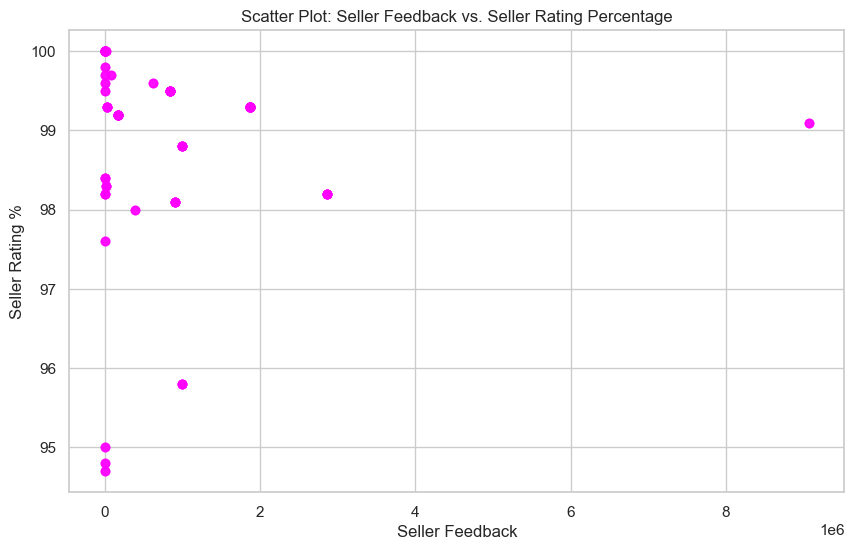

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Seller_feedback'], df['Seller_Rating%'], alpha=0.5, color='magenta')
plt.title("Scatter Plot: Seller Feedback vs. Seller Rating Percentage")
plt.xlabel("Seller Feedback")
plt.ylabel("Seller Rating %")
plt.grid(True)
plt.show()

In [26]:
correlation = df['Seller_feedback'].corr(df['Seller_Rating%'])
print("Correlation between Seller Feedback and Seller Rating Percentage:", correlation)

Correlation between Seller Feedback and Seller Rating Percentage: -0.018294081667655483


#### Is there correlations between "Price_sold" and "Seller_Rating%"?

In [27]:
correlation = df['Price_sold'].corr(df['Seller_Rating%'])
print("Correlation between Price Sold and Seller Rating Percentage:", correlation)

Correlation between Price Sold and Seller Rating Percentage: -0.16093314584460142


### Correlation matrix

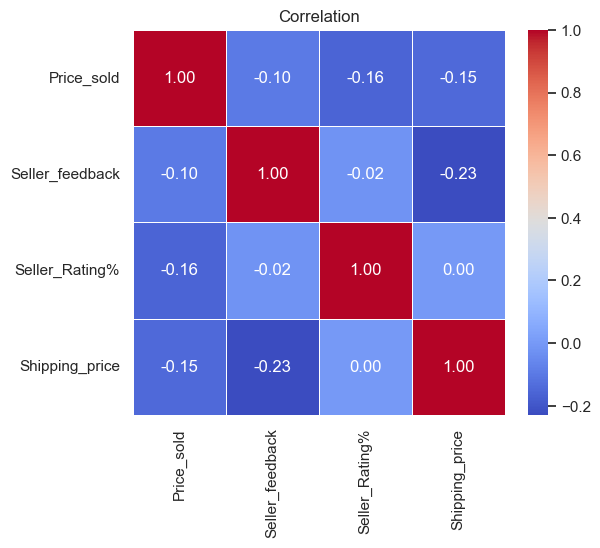

In [28]:
correlation_matrix = df.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation")
plt.show()